In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import pickle

%matplotlib inline

In [2]:
data = pd.read_csv("./data/data.csv")

In [3]:
data.columns

feat_cols = ['valence', 'acousticness', 'danceability', 'energy', 
             'instrumentalness', 'liveness', 'loudness', 'speechiness']

X = data[feat_cols]

In [4]:
X.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
0,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366
1,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150
2,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339
3,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354
4,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   danceability      170653 non-null  float64
 3   energy            170653 non-null  float64
 4   instrumentalness  170653 non-null  float64
 5   liveness          170653 non-null  float64
 6   loudness          170653 non-null  float64
 7   speechiness       170653 non-null  float64
dtypes: float64(8)
memory usage: 10.4 MB


In [6]:
X.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,0.502115,0.537396,0.482389,0.167010,0.205839,-11.467990,0.098393
std,0.263171,0.376032,0.176138,0.267646,0.313475,0.174805,5.697943,0.162740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,0.317000,0.102000,0.415000,0.255000,0.000000,0.098800,-14.615000,0.034900
50%,0.540000,0.516000,0.548000,0.471000,0.000216,0.136000,-10.580000,0.045000
75%,0.747000,0.893000,0.668000,0.703000,0.102000,0.261000,-7.183000,0.075600
max,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.970000


In [7]:
## Scale loudness to be between 0 and 1

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

loudness = X["loudness"].values
X["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

<ipython-input-7-343353e4c333>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


In [8]:
X.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,0.502115,0.537396,0.482389,0.167010,0.205839,0.760035,0.098393
std,0.263171,0.376032,0.176138,0.267646,0.313475,0.174805,0.089233,0.162740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,0.102000,0.415000,0.255000,0.000000,0.098800,0.710751,0.034900
50%,0.540000,0.516000,0.548000,0.471000,0.000216,0.136000,0.773941,0.045000
75%,0.747000,0.893000,0.668000,0.703000,0.102000,0.261000,0.827140,0.075600
max,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,0.970000


## Clustering

In [9]:
from sklearn.cluster import KMeans

# use elbow method to find K
ks = range(1, 20)
sse = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19


Text(0, 0.5, 'SSE')

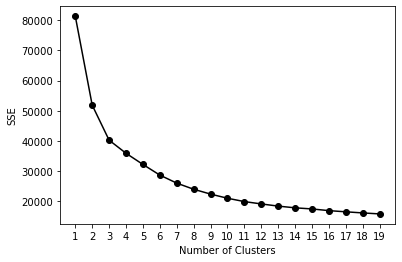

In [10]:
plt.plot(ks, sse, '-o', color='black')
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

From this I'm deciding to go with a K value of 5

In [11]:
cluster_model = KMeans(n_clusters=5)
cluster_model.fit(X)

cluster_model.inertia_

32200.374407418385

In [46]:
pickle.dump(cluster_model, open("cluster_model.sav", 'wb'))

In [12]:
# Make predictions
cluster_predictions = cluster_model.predict(X)

In [13]:
cluster_predictions.shape

(170653,)

In [14]:
# Assign cluster back to main dataset
data['cluster'] = cluster_predictions

In [15]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,4
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,3


## Visualizing Clusters

In [16]:
# we can't visualize 8 features, so we break things down using PCA to get the most important features

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [17]:
pca_df = pd.DataFrame(pca_data)
pca_df['cluster'] = cluster_predictions

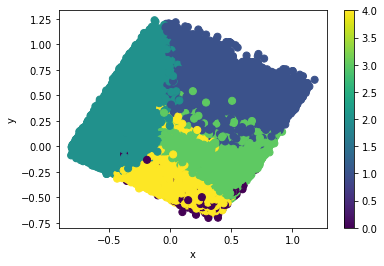

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(pca_df.iloc[:,0].values, pca_df.iloc[:,1].values, c=cluster_predictions, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

Cluster 0, 1, 2 and 3 are well defined. Also, a lot of songs don't fall into cluster 4

### Analyse clusters

In [19]:
clu0 = X[data.cluster == 0]
clu0.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000
mean,0.525984,0.513387,0.677604,0.249839,0.003762,0.305340,0.649238,0.895110
std,0.169894,0.302786,0.070437,0.150365,0.036865,0.202318,0.061754,0.108627
min,0.000000,0.000012,0.312000,0.004710,0.000000,0.032500,0.332582,0.335000
25%,0.404000,0.244000,0.639000,0.158000,0.000000,0.152000,0.608872,0.902000
50%,0.542000,0.525000,0.696000,0.212000,0.000000,0.248000,0.647827,0.938000
75%,0.651000,0.786000,0.718000,0.296000,0.000000,0.383000,0.682045,0.952000
max,1.000000,0.995000,0.977000,0.996000,0.759000,0.988000,0.886540,0.970000


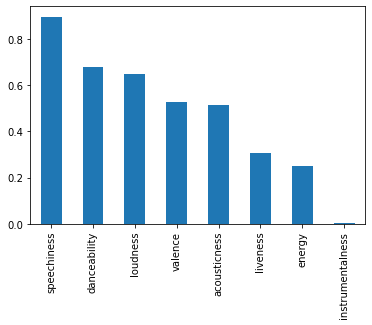

In [20]:
clu0[feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

Cluster 0 has more Acoustic and loud songs

In [21]:
clu1 = X[data.cluster == 1]
clu1.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000
mean,0.393225,0.884997,0.419401,0.242858,0.826395,0.182921,0.664232,0.059705
std,0.287171,0.191706,0.179093,0.184331,0.126977,0.150372,0.098322,0.058887
min,0.000000,0.000000,0.000000,0.000020,0.378000,0.022000,0.078302,0.000000
25%,0.128000,0.876000,0.288000,0.102000,0.773000,0.102000,0.607685,0.036800
50%,0.344000,0.970000,0.416000,0.204000,0.873000,0.122000,0.675867,0.043100
75%,0.631000,0.992000,0.548000,0.339000,0.916000,0.199000,0.734602,0.056100
max,0.990000,0.996000,0.934000,1.000000,1.000000,0.988000,1.000000,0.926000


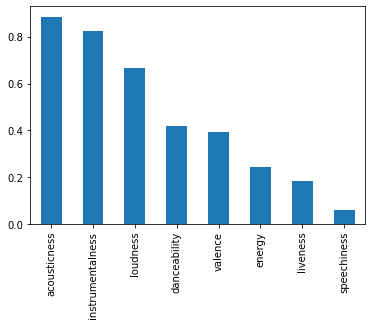

In [22]:
clu1[feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

Cluster 1 has more happy and loud songs

In [23]:
clu2 = X[data.cluster == 2]
clu2.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000
mean,0.576430,0.115265,0.582381,0.709849,0.071648,0.209664,0.817526,0.084625
std,0.237658,0.123262,0.167353,0.172841,0.196606,0.184039,0.051567,0.085908
min,0.000000,0.000000,0.000000,0.000103,0.000000,0.010100,0.365860,0.000000
25%,0.392000,0.011000,0.467000,0.583000,0.000000,0.091300,0.785671,0.035200
50%,0.588000,0.068000,0.589000,0.722000,0.000044,0.137000,0.826278,0.049300
75%,0.771000,0.193000,0.706000,0.853000,0.007010,0.278000,0.856362,0.089800
max,1.000000,0.653000,0.988000,1.000000,0.999000,1.000000,0.998262,0.901000


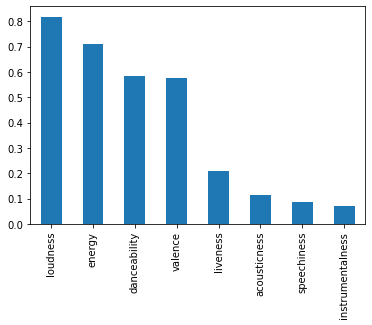

In [24]:
clu2[feat_cols].mean().sort_values(ascending=False).plot(kind='bar') # I'm guess rock or metal

In [25]:
clu3 = X[data.cluster == 3]
clu3.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,34233.000000,34233.000000,34233.000000,34233.000000,34233.000000,34233.000000,34233.000000,34233.000000
mean,0.306124,0.820328,0.429343,0.239742,0.034364,0.194893,0.715224,0.051908
std,0.152596,0.175439,0.143647,0.133800,0.085147,0.161459,0.074247,0.051687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.183000,0.728000,0.324000,0.138000,0.000001,0.104000,0.674387,0.032300
50%,0.301000,0.881000,0.430000,0.226000,0.000126,0.130000,0.723624,0.037900
75%,0.421000,0.961000,0.533000,0.324000,0.009850,0.223000,0.766267,0.048600
max,0.814000,0.996000,0.911000,0.999000,0.504000,0.998000,0.918832,0.634000


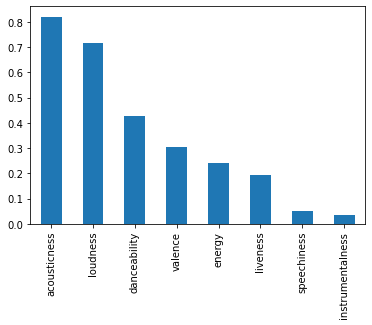

In [26]:
clu3[feat_cols].mean().sort_values(ascending=False).plot(kind='bar') # I'm guessing slow soundtracks

In [27]:
clu4 = X[data.cluster == 4]
clu4.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,34374.000000,34374.000000,34374.000000,34374.000000,34374.000000,34374.000000,34374.000000,34374.000000
mean,0.750510,0.706581,0.616492,0.462971,0.038156,0.210249,0.772619,0.078647
std,0.146273,0.192361,0.124681,0.173541,0.107637,0.174035,0.056104,0.083642
min,0.216000,0.122000,0.127000,0.000685,0.000000,0.009670,0.349965,0.022600
25%,0.644000,0.551000,0.531000,0.336000,0.000000,0.097700,0.737170,0.035600
50%,0.759000,0.712000,0.620000,0.453000,0.000028,0.143000,0.776603,0.046900
75%,0.874000,0.870000,0.704000,0.576000,0.004925,0.273000,0.812544,0.077300
max,1.000000,0.996000,0.980000,0.991000,0.865000,0.997000,0.956433,0.705000


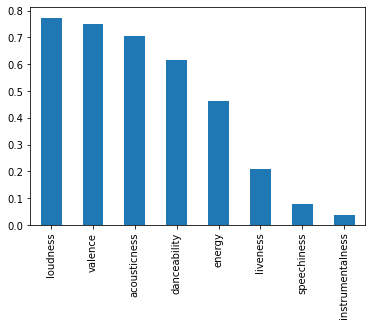

In [28]:
clu4[feat_cols].mean().sort_values(ascending=False).plot(kind='bar') # I'm guessing rap songs

## Classifying

In [29]:
df_classify = data[feat_cols + ['cluster']]

loudness = df_classify["loudness"].values
df_classify["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

<ipython-input-29-a16f73686ad0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


In [30]:
df_classify.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,cluster
0,0.0594,0.982,0.279,0.211,0.878000,0.665,0.624916,0.0366,1
1,0.9630,0.732,0.819,0.341,0.000000,0.160,0.744797,0.4150,4
2,0.0394,0.961,0.328,0.166,0.913000,0.101,0.707071,0.0339,1
3,0.1650,0.967,0.275,0.309,0.000028,0.381,0.793736,0.0354,3
4,0.2530,0.957,0.418,0.193,0.000002,0.229,0.781521,0.0380,3


In [31]:
X = df_classify[feat_cols]
y = df_classify['cluster']

### Split data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

### Train models

0.9859658375084235


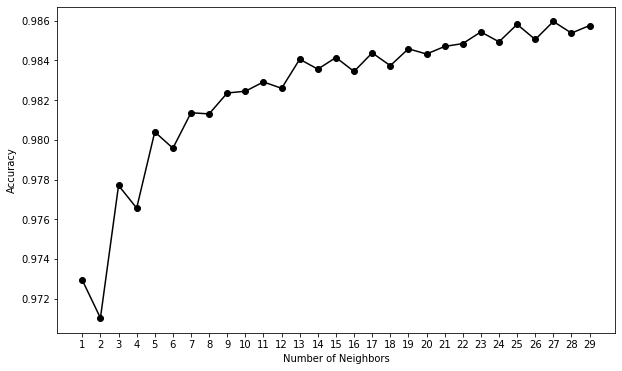

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

kn = range(1, 30)
accuracy = []
for i in kn:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(kn, accuracy, '-o', color='black')
plt.xticks(kn)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

print(max(accuracy))

0.9586299844715948


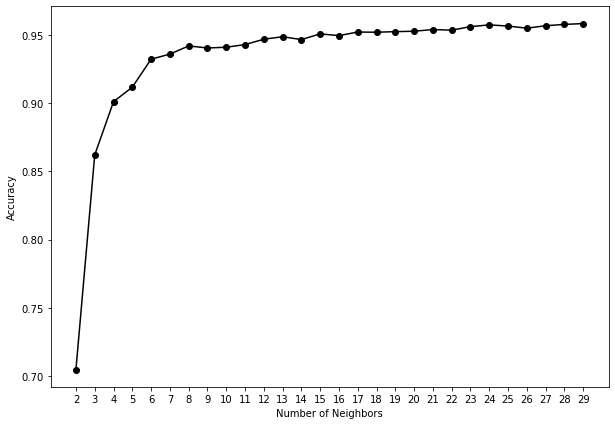

In [34]:
from sklearn.ensemble import RandomForestClassifier

ln = range(2, 30)
accuracy = []
for i in ln:
    rf = RandomForestClassifier(max_leaf_nodes=i)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(ln, accuracy, '-o', color='black')
plt.xticks(ln)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

print(max(accuracy))

In [35]:
from sklearn.svm import SVC

classification_model = SVC()
classification_model.fit(X_train, y_train)
pred = classification_model.predict(X_test)

In [36]:
accuracy_score(y_test, pred)

0.9971580088482611

In [37]:
confusion_matrix(y_test, pred)

array([[ 1047,     1,     6,     1,     5],
       [    0,  5121,     9,     2,     1],
       [    0,     8, 14189,    10,     3],
       [    1,     7,     4,  6845,     7],
       [    0,     5,    11,    16,  6832]])

In [47]:
pickle.dump(classification_model, open("classification_model.sav", 'wb'))

## Clustering my liked songs

In [38]:
liked_songs = pd.read_json("./data/spotify-liked-songs.json")

In [39]:
df_liked = liked_songs[feat_cols]

loudness = df_liked["loudness"].values
df_liked["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

df_liked.head()

<ipython-input-39-0a2eef45c731>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liked["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
0,0.437,0.09410,0.728,0.612,0.18800,0.3990,0.427254,0.0499
1,0.626,0.06060,0.503,0.935,0.83100,0.1340,0.598425,0.0368
2,0.157,0.11300,0.204,0.886,0.00450,0.3500,1.000000,0.0662
3,0.660,0.00897,0.655,0.971,0.00005,0.0771,0.955097,0.0833
4,0.265,0.00234,0.527,0.949,0.82900,0.1060,0.845925,0.0441


In [40]:
liked_songs['cluster'] = classification_model.predict(df_liked)

In [41]:
liked_songs.cluster.value_counts()

2    126
1     15
4     14
3     10
Name: cluster, dtype: int64

In [42]:
liked_songs.to_json("./data/my_clustered_liked_songs.json", orient ='records')